# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3



Chosen class grouping: alpha-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes exists. Continuing with execution


In [3]:
PH3_IS_W2 = False

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

Directory /Users/diego/Desktop/iteso/TOG/data/PH1/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2 exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2 exists. Continuing with execution


# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,current_frame,h0x,h0y,h0z,...,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z,active_hand
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0.356595,0.485021,-1.312914e-07,...,0.509847,0.324974,-0.511315,0.582418,0.521928,-0.164979,0.419079,0.505322,-0.183779,1
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0.567594,0.906298,4.943682e-09,...,0.509847,0.324974,-0.511315,0.582418,0.521928,-0.164979,0.419079,0.505322,-0.183779,0
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0.352816,0.484037,-1.180915e-07,...,0.513431,0.326082,-0.519151,0.579848,0.519345,-0.151877,0.419200,0.498523,-0.208451,1
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0.567833,0.905873,4.337321e-09,...,0.513431,0.326082,-0.519151,0.579848,0.519345,-0.151877,0.419200,0.498523,-0.208451,0
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,2,0.351332,0.480660,-1.254345e-07,...,0.511904,0.326614,-0.538389,0.582581,0.522652,-0.176160,0.420109,0.498809,-0.215022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,9,0.632517,0.482991,-1.874786e-07,...,0.484490,0.289181,-0.421546,0.572918,0.474172,-0.078406,0.397896,0.484275,-0.113990,1
69568,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,0.634008,0.486989,-1.780656e-07,...,0.483038,0.285413,-0.406400,0.570957,0.473768,-0.055774,0.396282,0.485782,-0.104788,1
69569,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,10,0.403709,0.829567,1.847001e-08,...,0.483038,0.285413,-0.406400,0.570957,0.473768,-0.055774,0.396282,0.485782,-0.104788,0
69570,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,11,0.643907,0.492386,-1.789463e-07,...,0.480457,0.287692,-0.410172,0.570401,0.466859,-0.068966,0.398920,0.484171,-0.099403,1


# Cleanup

## Identify numeric columns which will go through standardization and dimensionality reduction

In [6]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

## Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = prePH3_ah_frame_df[sup.tag_columns+sup.class_columns+[sup.current_frame_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_3

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,h0x,h0y,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-1.386520,-0.521189,...,1.463484,0.644295,1.170829,-0.407972,0.210396,1.848989,-0.062248,0.216181,1.606237,-0.221776
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,0.665443,1.581196,...,0.773043,0.644295,1.170829,-0.407972,0.210396,1.848989,-0.062248,0.216181,1.606237,-0.221776
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,-1.423279,-0.526099,...,1.456494,0.782568,1.189547,-0.461941,0.125961,1.806461,0.050207,0.221499,1.482108,-0.412667
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,0.667769,1.579076,...,0.779917,0.782568,1.189547,-0.461941,0.125961,1.806461,0.050207,0.221499,1.482108,-0.412667
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,2,-1.437705,-0.542955,...,1.374612,0.723646,1.198555,-0.594440,0.215747,1.860906,-0.158211,0.261254,1.487337,-0.463512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,1.296819,-0.531322,...,0.520388,-0.334143,0.565833,0.210291,-0.101657,1.062867,0.680794,-0.710253,1.221976,0.318202
69568,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,1.311323,-0.511368,...,0.327170,-0.390150,0.502135,0.314608,-0.166074,1.056209,0.875037,-0.780821,1.249501,0.389403
69569,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.928343,1.198271,...,-0.214185,-0.390150,0.502135,0.314608,-0.166074,1.056209,0.875037,-0.780821,1.249501,0.389403
69570,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.407583,-0.484435,...,0.677698,-0.489734,0.540657,0.288627,-0.184336,0.942477,0.761810,-0.665455,1.220072,0.431069


## Save standardizers

In [9]:
with open(os.path.join(PH3_SUB_BINGEN_ROOT, f"scaler_{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

# Dimensionality Reduction

## Helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def flatten_video(group):
  data_cols = [col for col in group.columns if col not in 
                sup.tag_columns + sup.class_columns + [sup.current_frame_col]]

  flattened_dict = {}

  frame_list = []
  for _, row in group.iterrows():
      frame_num = int(row[sup.current_frame_col])
      frame_list.append(frame_num)
      prefix = f"f{frame_num}_"
      for col in data_cols:
          flattened_dict[prefix + col] = row[col]

  if frame_list != [i for i in range(12)]:
     print("Big probelm 2")
     print(frame_list)
     print(group.iloc[0][sup.tag_columns])

  # Add the group keys (the tags)
  group_keys = group.iloc[0][sup.tag_columns + sup.class_columns].to_dict()
  group_keys.update(flattened_dict)
  return pd.DataFrame([group_keys])

In [12]:
def visualize(origin_df, data_cols, data_unit, label_col, reducer_name, kernel_name=""):    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    if label_col == sup.active_hand_col:
        filtered_df = origin_df
    else:
        spf_df = origin_df[origin_df[sup.active_hand_col] == 1]
        if data_unit == sup.DATA_S_PF:
            filtered_df = spf_df
        elif data_unit == sup.DATA_S_PV:
            filtered_df = spf_df\
                .groupby(sup.tag_columns+sup.class_columns)\
                .apply(flatten_video).reset_index(drop=True)

    labels_cat = filtered_df[label_col].astype('category')
    categories = labels_cat.cat.categories
    cat_to_idx = {cat: i for i, cat in enumerate(categories)}
    colors = labels_cat.map(cat_to_idx)
    cmap = plt.cm.Spectral

    if reducer_name == sup.PH3_REDUCER_NAME_PCA:
        reducer = PCA(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
        reducer = umap.UMAP(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
        nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
        reducer = make_pipeline(nystroem, PCA(n_components=3, random_state=42))

    if data_unit == sup.DATA_S_PV:
        filtered_data = reducer.fit_transform(filtered_df.drop(columns=sup.tag_columns+sup.class_columns))
    else:
        data = reducer.fit_transform(origin_df.drop(columns=sup.tag_columns+sup.class_columns+[sup.current_frame_col]))
        if label_col == sup.active_hand_col:
            filtered_data = data
        else:
            filtered_data = data[origin_df[sup.active_hand_col] == 1]
    
    sc = ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], c=colors, cmap=cmap, s=20)

    for cat, idx in cat_to_idx.items():
        ax.scatter([], [], [], color=cmap(idx / (len(categories) - 1)), label=cat)
    ax.legend(title=label_col)

    figtitle = f"{reducer_name}-{kernel_name}-{data_unit}"
    ax.set_title(figtitle)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    figpath = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{figtitle}.png")
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

    plt.show()

def writeout(origin_df, data_cols, label_cols, reducer_name, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if reducer_name == sup.PH3_REDUCER_NAME_PCA:
            reducer = PCA(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
            reducer = umap.UMAP(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
            nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
            reducer = make_pipeline(nystroem, PCA(n_components=n, random_state=42))

        data = reducer.fit_transform(origin_df[data_cols])

        reduced_df = pd.DataFrame(data)
        reduced_df[sup.tag_columns+label_cols+[sup.current_frame_col]] = origin_df[sup.tag_columns+label_cols+[sup.current_frame_col]]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{sup.DATA_AH_PF}_{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{sup.DATA_AH_PF}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [13]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution


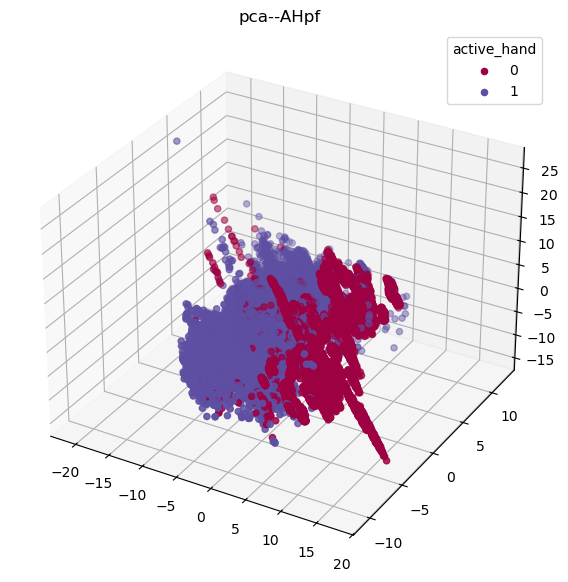

In [15]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution


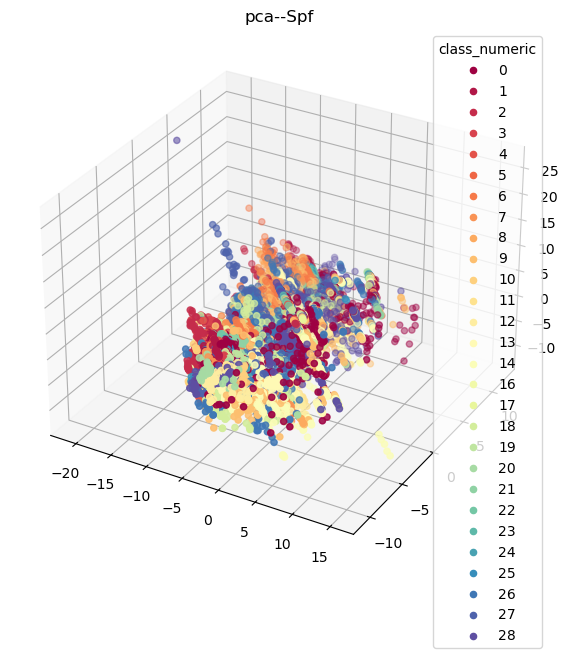

In [16]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution


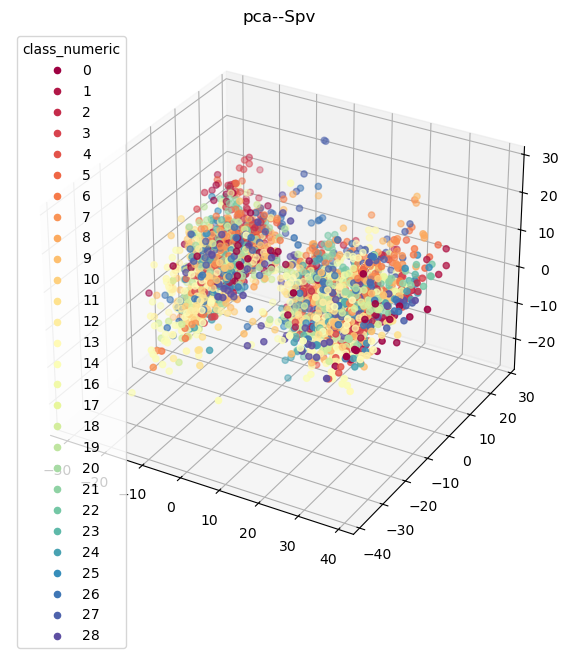

In [17]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

#### Writeout

In [18]:
writeout(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/pca/ exists. Continuing with execution
Directory /Users/diego/De

## Kernel PCA

In [19]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

In [20]:
PH3_AH_FRM_KPCA_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,h0x,h0y,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,0,-1.386520,-0.521189,...,1.463484,0.644295,1.170829,-0.407972,0.210396,1.848989,-0.062248,0.216181,1.606237,-0.221776
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,0,0.665443,1.581196,...,0.773043,0.644295,1.170829,-0.407972,0.210396,1.848989,-0.062248,0.216181,1.606237,-0.221776
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,1,-1.423279,-0.526099,...,1.456494,0.782568,1.189547,-0.461941,0.125961,1.806461,0.050207,0.221499,1.482108,-0.412667
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,0,1,0.667769,1.579076,...,0.779917,0.782568,1.189547,-0.461941,0.125961,1.806461,0.050207,0.221499,1.482108,-0.412667
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_a.mp4,p01,1,0,a,0,1,2,-1.437705,-0.542955,...,1.374612,0.723646,1.198555,-0.594440,0.215747,1.860906,-0.158211,0.261254,1.487337,-0.463512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69567,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,9,1.296819,-0.531322,...,0.520388,-0.334143,0.565833,0.210291,-0.101657,1.062867,0.680794,-0.710253,1.221976,0.318202
69568,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,10,1.311323,-0.511368,...,0.327170,-0.390150,0.502135,0.314608,-0.166074,1.056209,0.875037,-0.780821,1.249501,0.389403
69569,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,0,10,-0.928343,1.198271,...,-0.214185,-0.390150,0.502135,0.314608,-0.166074,1.056209,0.875037,-0.780821,1.249501,0.389403
69570,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,28,1,11,1.407583,-0.484435,...,0.677698,-0.489734,0.540657,0.288627,-0.184336,0.942477,0.761810,-0.665455,1.220072,0.431069


#### Exploration

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution


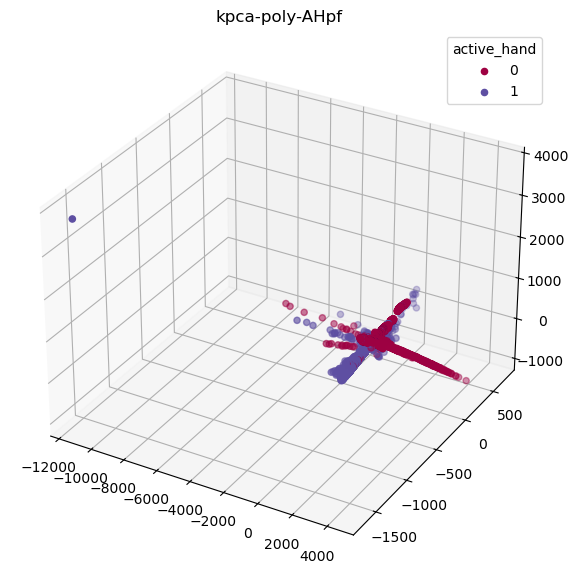

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/rbf exists. Continuing with execution


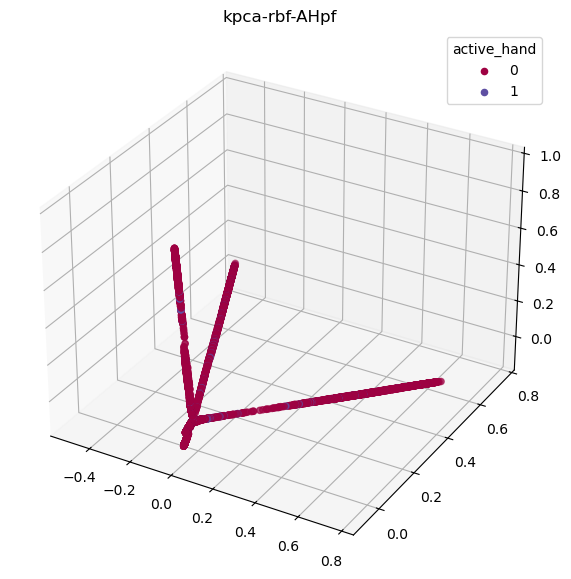

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/sigmoid exists. Continuing with execution


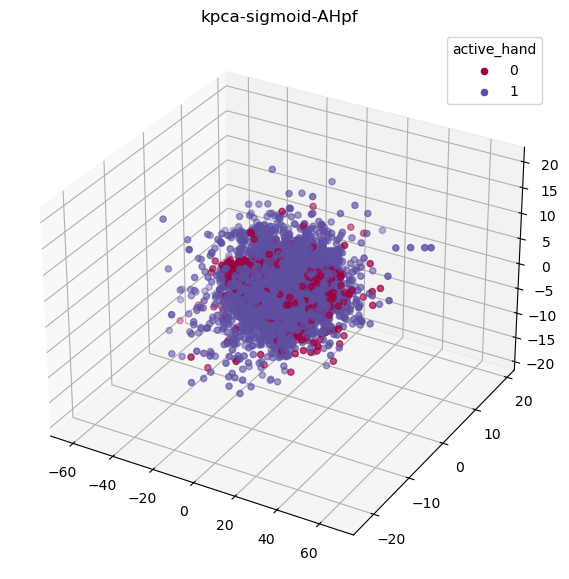

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/cosine exists. Continuing with execution


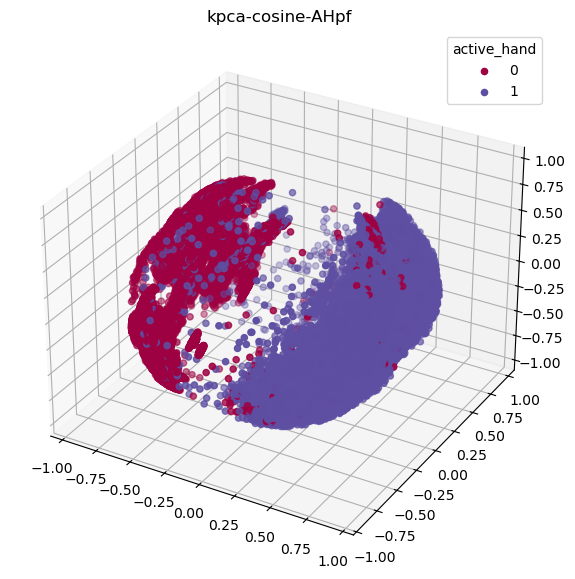

In [21]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution


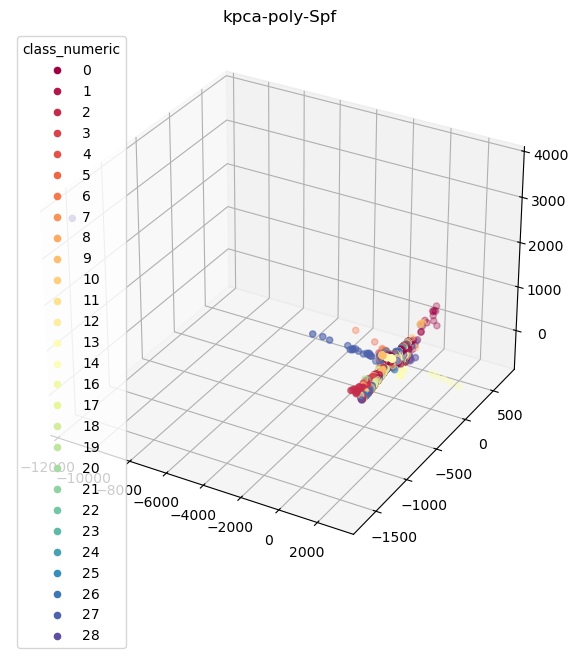

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/rbf exists. Continuing with execution


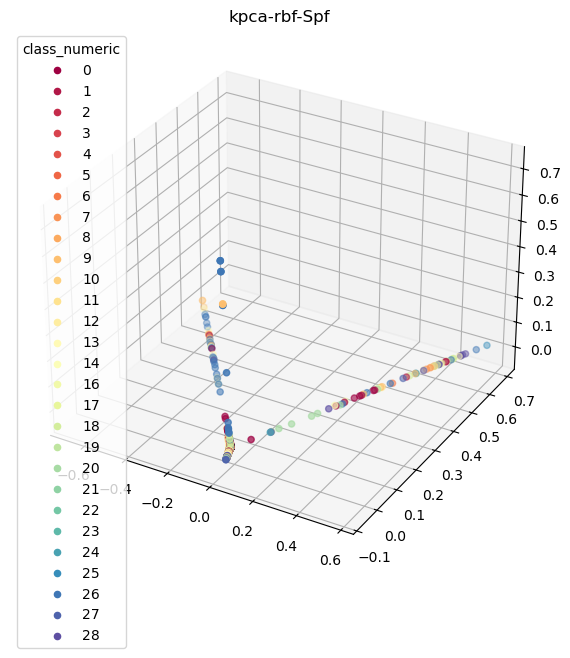

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/sigmoid exists. Continuing with execution


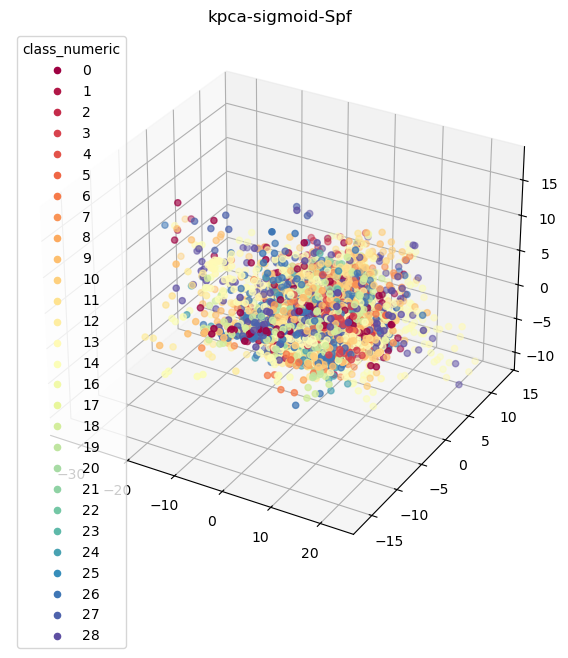

Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/cosine exists. Continuing with execution


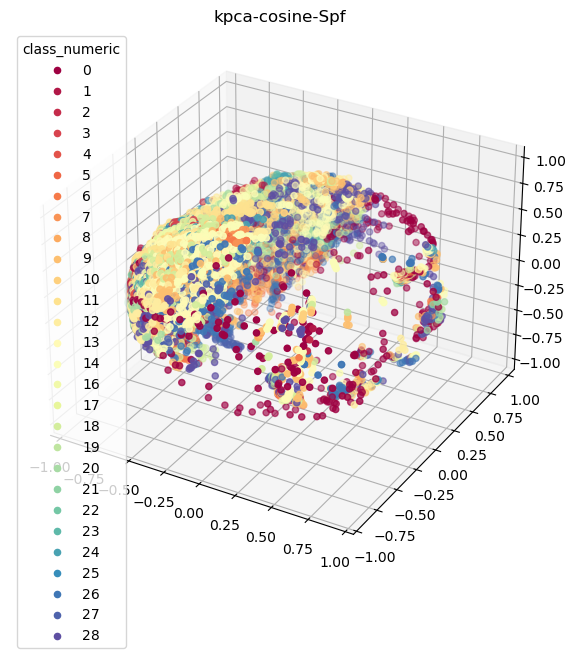

In [22]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution


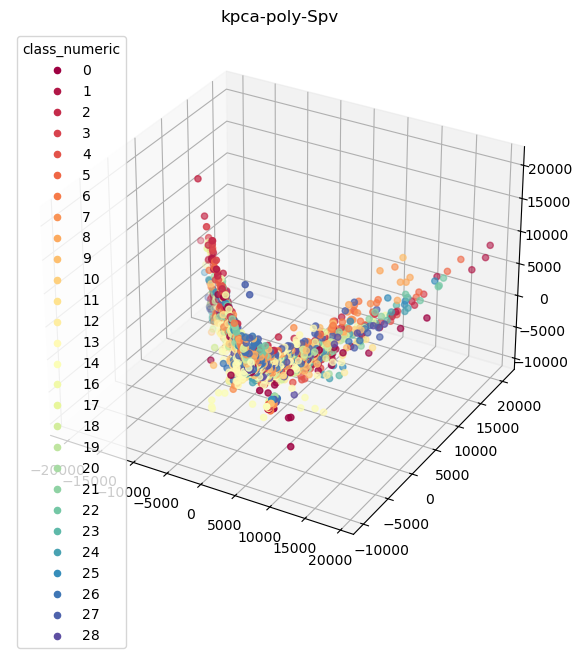

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/rbf exists. Continuing with execution


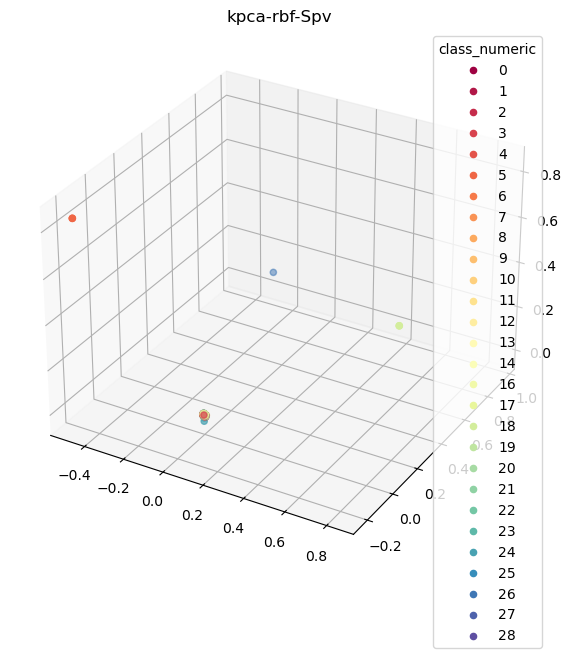

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/sigmoid exists. Continuing with execution


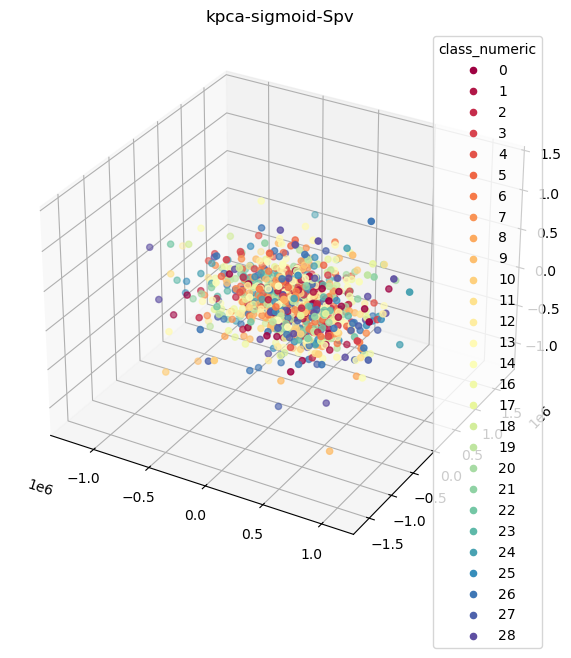

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/kpca/cosine exists. Continuing with execution


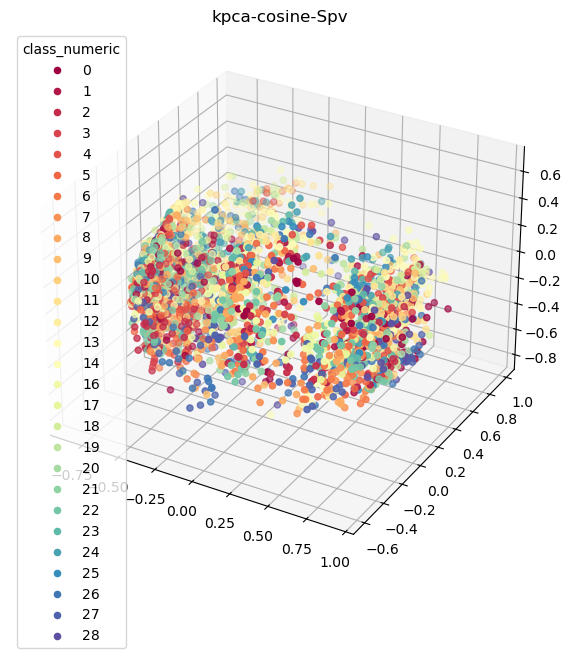

In [23]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [24]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/kpca/poly exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/kpca/poly exists. Contin

## UMAP

In [25]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution


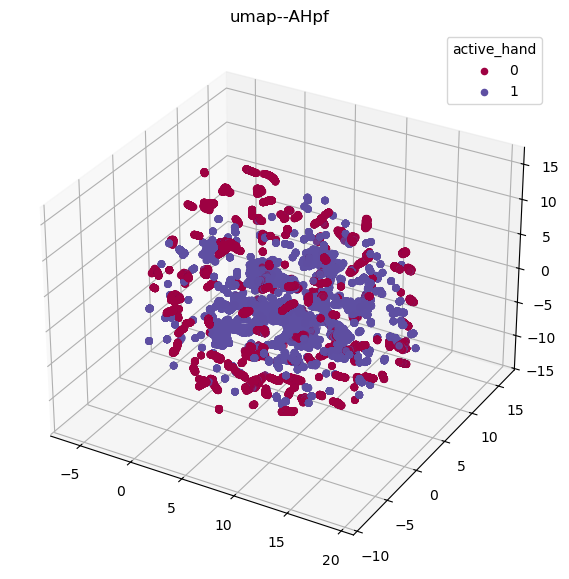

In [26]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution


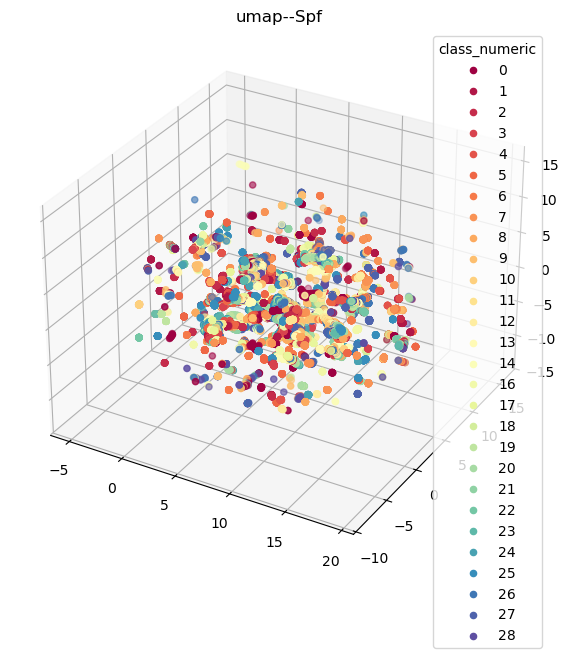

In [27]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_31237/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/media/gen/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution


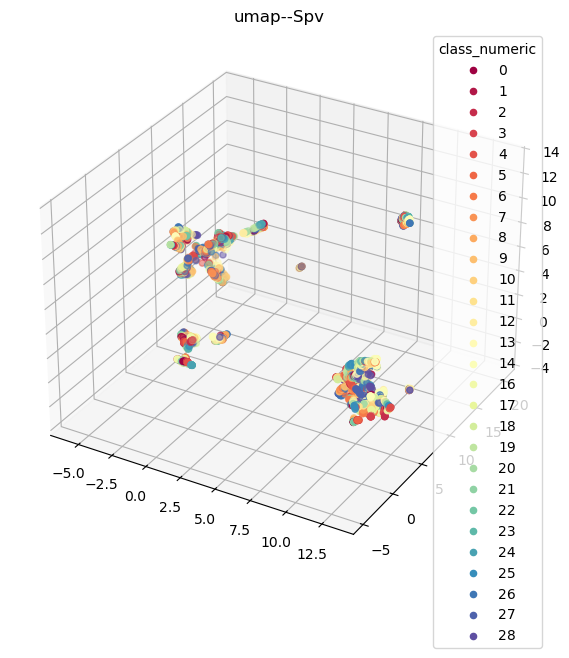

In [28]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

#### Writeout

In [ ]:
writeout(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/PH3/alpha-classes/wo2/umap/ exists. Continuing with execution


/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
